<a href="https://colab.research.google.com/github/DarkFire414/IOTwebpage/blob/main/RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


		 Random walk, genere un número n de pasos aleatorios
	Ingrese el número de pasos a generar (número entero positivo) 

		 n = 1000
	Ingrese la longitud L del paso (número decimal o entero positivo) 

		 L = 0.3

	 Guardando datos de la simulación en root/csv_file.csv

	 Distancia total recorrida, d = 6.4522

	 Se muestra el gráfico de la caminata, los pasos pueden verse distintos tamaños debido a la escala de cada eje...

	 Guardando imagen en root/plotImg.png


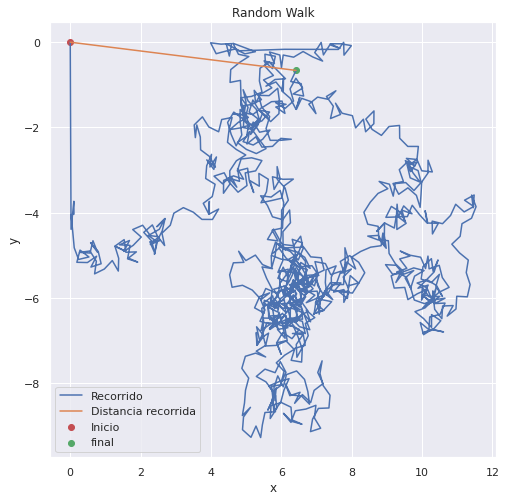

In [80]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv 

def saveToCSV(xdata, ydata):
  data = []

  headers = ["x", "y"]

  # open the file in the write mode
  f = open('csv_file', 'w', encoding='UTF8', newline='')

  # create the csv writer
  writer = csv.writer(f)

  # write a row to the csv file
  writer.writerow(headers)

  for i in range(len(xdata)):
    data.append([round(xdata[i], 4), round(ydata[i], 4)])
  
  writer.writerows(data)

  # close the file
  f.close()

def validPoint(px, py, dicc):
  def c1():
    return ((px>0) and (py>0))
  def c2():
    return ((px<0) and (py>0))
  def c3():
    return ((px<0) and (py<0))
  def c4():
    return ((px>0) and (py<0))
  funcs = {
      "I": c1,
      "II": c2,
      "III": c3,
      "IV": c4
  }
  for i in dicc:
    if (not dicc[i]):
      if (funcs[i]()):
        return False
  return True

def genNewPoint(L):
  theta = random.uniform(0, 2*np.pi)
  return [L * np.cos(theta), L * np.sin(theta)]

#@title Cuadrantes permitidos
C_I = False #@param {type: "boolean"}
C_II = False #@param {type: "boolean"}
C_III = False #@param {type: "boolean"}
C_IV = True #@param {type: "boolean"}
dicc = {
    "I": C_I, 
    "II": C_II,
    "III": C_III,
    "IV": C_IV,
}

print("\n\t\t Random walk, genere un número n de pasos aleatorios")

while True:
    try:
        # Pasos de la caminata
        n = int(input("\tIngrese el número de pasos a generar (número entero positivo) \n\n\t\t n = "))
        
        if n<0:
            print("\n\tDebe ingresarse un número positivo, intente nuevamente")
            continue
        
        # Longitud del paso
        L = float(input("\tIngrese la longitud L del paso (número decimal o entero positivo) \n\n\t\t L = "))
        
        if L<0:
            print("\n\tDebe ingresarse un número positivo, intente nuevamente")
            continue
        break
   
    except:
        print("\n\tOcurrió un error al guardar la información, intente nuevamente")    

# Coordenadas
xs = [0]
ys = [0]

tmpx, tmpy = 0, 0

for i in range(1, n+1, 1):
    while(1):
      point = genNewPoint(L)
      tmpx = tmpx + point[0]
      tmpy = tmpy + point[1]
      if (validPoint(tmpx, tmpy, dicc)):
        break  
      else:
        continue

    xs.append(tmpx)
    ys.append(tmpy)
    tmpx = xs[i]
    tmpy = ys[i]
    
    #print("\n\n\tPaso " + str(i) + " - \tx = " + str( round(xs[i], 4) ) + "\t\t y = " + str( round(ys[i], 4) ) )
try:
  print("\n\t Guardando datos de la simulación en root/csv_file.csv")
  saveToCSV(xs, ys)
except:
  print("\n\t Ocurrió un error al guardar los datos")

d = pow( pow(xs[-1], 2) + pow(ys[-1], 2), 0.5)
print("\n\t Distancia total recorrida, d = " + str(round(d, 4)))

print("\n\t Se muestra el gráfico de la caminata, los pasos pueden verse distintos tamaños debido a la escala de cada eje...")

sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(8, 8)}) #width=8, height=4
plt.plot(xs, ys)
plt.plot( [xs[0], xs[-1]] , [ys[0], ys[-1]])
plt.scatter( xs[0] , ys[0]  , c = 'r')
plt.scatter( xs[-1], ys[-1] , c = 'g' )
plt.legend( ['Recorrido', 'Distancia recorrida', 'Inicio', 'final'] )
plt.title('Random Walk')
plt.xlabel('x')
plt.ylabel('y')
#plt.grid()

try:
  print("\n\t Guardando imagen en root/plotImg.png")
  plt.savefig('plotImg.png', dpi=100)
except:
  print("\n\t Ocurrió un error al guardar la imagen")

plt.show()

